<a href="https://colab.research.google.com/github/mboroto89/mboroto89/blob/main/Learner%2BNotebook%2B_%2BFull%2BCode%2BVersion%2B_%2BPotential%2BCustomers%2BPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries and data

In [12]:
import pandas as pd
# Load the datasets
data = pd.read_csv("/content/drive/MyDrive/Project 2/ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [16]:
# Display the first few rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [18]:
# Check for missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [19]:
# Get a summary of the dataset's statistics
data.describe(include='all')

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.000000,4612,4612,4612,4612.000000,4612.000000,4612.000000,4612,4612,4612,4612,4612,4612,4612.000000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT001,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.201214,NaN,NaN,NaN,3.566782,724.011275,3.026126,NaN,NaN,NaN,NaN,NaN,NaN,0.298569
std,NaN,13.161454,NaN,NaN,NaN,2.829134,743.828683,1.968125,NaN,NaN,NaN,NaN,NaN,NaN,0.457680
min,NaN,18.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,36.000000,NaN,NaN,NaN,2.000000,148.750000,2.077750,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,51.000000,NaN,NaN,NaN,3.000000,376.000000,2.792000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,57.000000,NaN,NaN,NaN,5.000000,1336.750000,3.756250,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Here's what we've observed from the initial exploration:

1.  The dataset contains several attributes of the leads, including demographic
information, interaction details with ExtraaLearn, and various flags indicating where the leads might have heard or seen about ExtraaLearn.
2. There are no missing values in any of the columns.
3. The target variable, **status**, has two classes: 0 (**unpaid customer**) and 1 (**paid customer**).
  The mean value of **status** is approximately 0.299, suggesting that around 29.9% of the leads converted to paid customers.
4. The dataset has a mix of categorical and numerical variables.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

##Missing Value Treatment

In [24]:
# Load the dataset again
df = pd.read_csv('/content/drive/MyDrive/Project 2/ExtraaLearn.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage (%)']

# Display columns with missing values (if any)
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)


Great! There are no missing values in the dataset.

##Feature Engineering

From our earlier observations and sanity checkcs, we didn't identify any explicit need for new features. The existing features seem to adequately capture the data's characteristics.

##Outlier detection and treatment

We'll focus on the numerical columns to detect outliers. Specifically, we'll examine the following columns:

1. age
2. website_visits
3. time_spent_on_website
4. page_views_per_visit
To visually identify outliers, we'll use box plots for each of these columns.

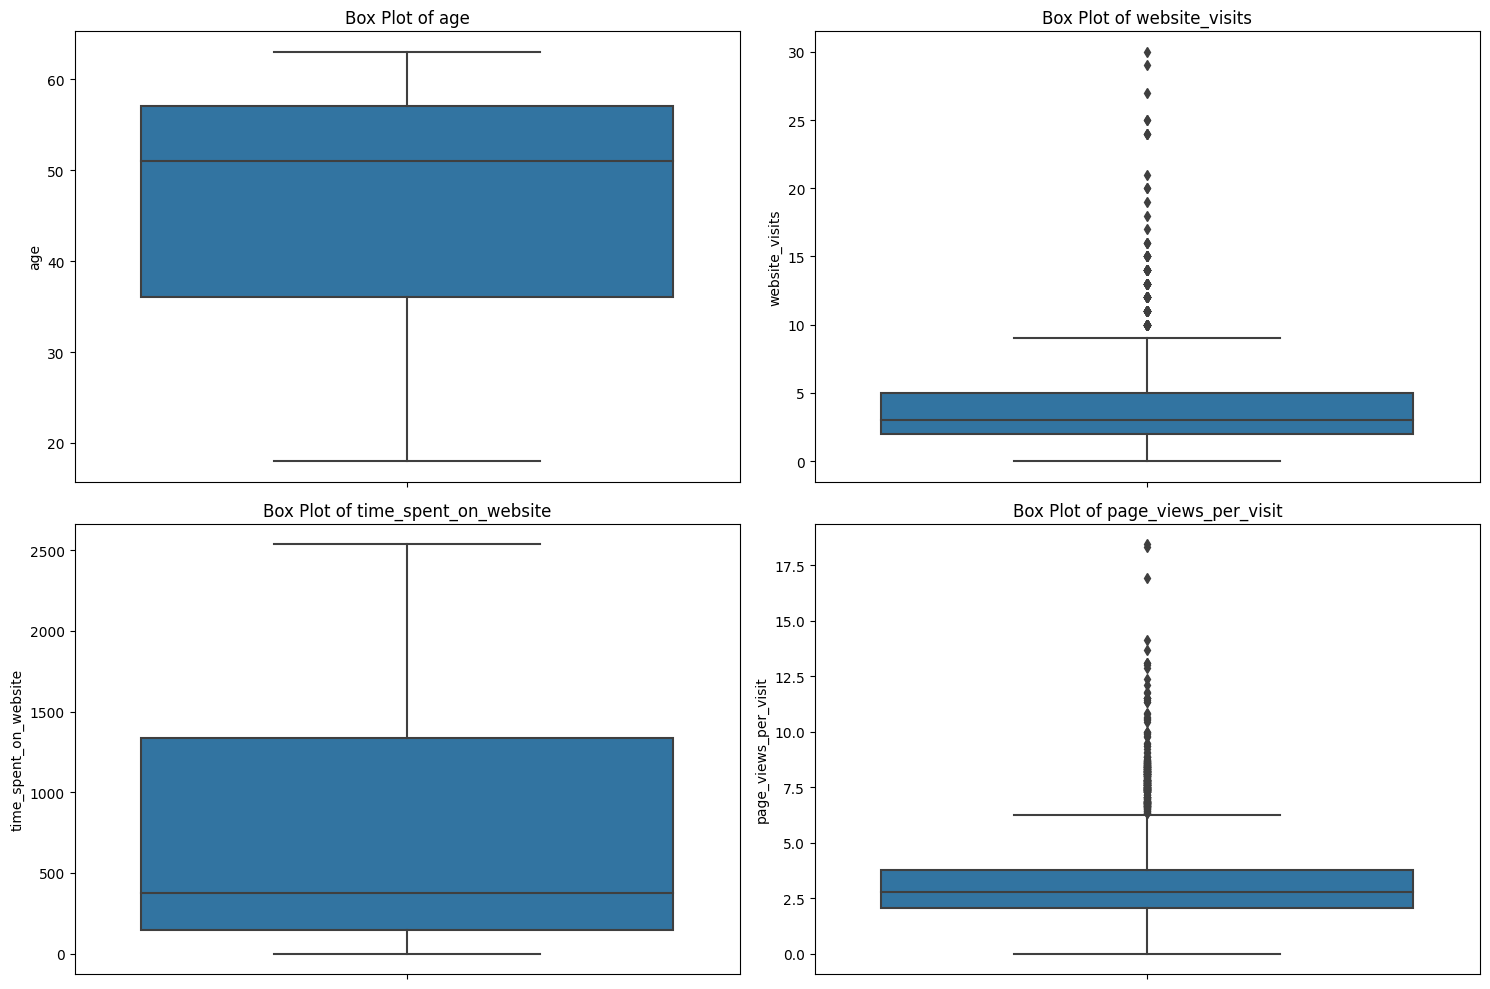

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Plotting boxplots for these columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

##From the boxplots of the numerical columns, we can observe:

1. age: There are a few outliers on the higher end, but given the nature of the data, these are plausible ages and might not need to be treated.
2. website_visits: There are several outliers, indicating that there are some leads who visited the website a significantly higher number of times than the majority.
3. time_spent_on_website: There are some outliers on the higher end. This suggests that a few leads spent an unusually long time on the website.
4. page_views_per_visit: Outliers are present, suggesting that some leads viewed a higher number of pages during their visits compared to others.

##Outlier Treatment Options:

*  **Capping**: We can cap the outliers at a certain value. For example, values
beyond a certain percentile (like the 99th percentile) can be capped to that percentile value.
*  **Transformation**: Transforming variables (e.g., using a logarithmic transformation) can sometimes reduce the impact of outliers.
*  **Removal**: If the outliers are believed to be errors or not representative of the typical data, they can be removed.

However, it's essential to be cautious when treating outliers. Sometimes they carry valuable information, especially in the context of lead conversion, where unique behaviors might be indicators of strong interest or disinterest.


##**General Recommendation**: Given the nature of the data and the domain (EdTech lead conversion), it might be best to retain the outliers in this case. Treating or removing them might lead to loss of potential patterns or signals that are crucial for predicting lead conversion

The best approach for handling outliers often depends on the context and the nature of the data. In this case, since we're dealing with lead conversion data for an EdTech company, the outliers might represent genuine patterns of user behavior, and removing or modifying them might lead to loss of valuable insights. Let's break down the considerations for each column:

1. age: While there are outliers on the higher end, they represent plausible ages. Older individuals might be looking for courses for various reasons, including personal interest or a career switch. Suggestion: Retain the data as it is.

2. website_visits: The outliers here indicate leads that visited the website significantly more times than others. These could be highly interested leads or those who were unsure and kept returning to the website for more information. Suggestion: Retain the data. High website visits might be a strong signal for conversion.

3. time_spent_on_website: Outliers indicate leads that spent an unusually long time on the website. These could be leads that are highly engaged with the content or are researching in-depth. Suggestion: Retain the data. A longer time spent might correlate with higher engagement and potential conversion.

4. page_views_per_visit: Some leads viewed more pages during their visits than others. This might indicate leads that are exploring multiple courses or gathering extensive information. Suggestion: Retain the data. Leads exploring multiple pages might be more likely to convert.


## EDA

- It is a good idea to explore the data once again after manipulating it.

We'll move on to the Exploratory Data Analysis (EDA) phase to gain more insights from the data. This will include:

1. Distribution of the target variable.
2. Distribution of numerical variables.
3. Distribution of categorical variables.
4. Relationship between features and the target variable.
Let's begin by visualizing the distribution of the target variable.

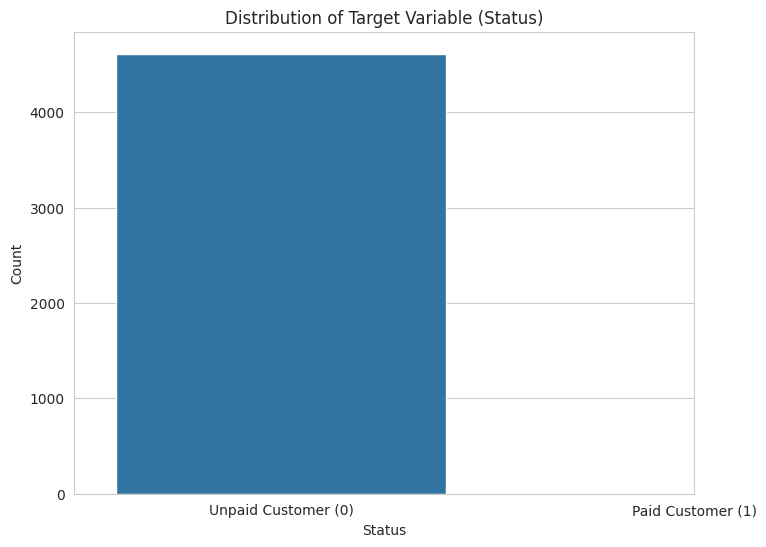

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data['status'])
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unpaid Customer (0)', 'Paid Customer (1)'])
plt.show()

## The distribution of the target variable status shows:

*   A larger number of leads did not convert (Unpaid Customers represented by 0).
*   A smaller proportion of leads converted to paid customers (Paid Customers represented by 1).

This is consistent with our earlier observation that about 29.9% of the leads converted to paid customers.

Next, let's explore the distribution of numerical variables like age, website_visits, time_spent_on_website, and page_views_per_visit. We'll visualize these distributions and see how they relate to the target variable.

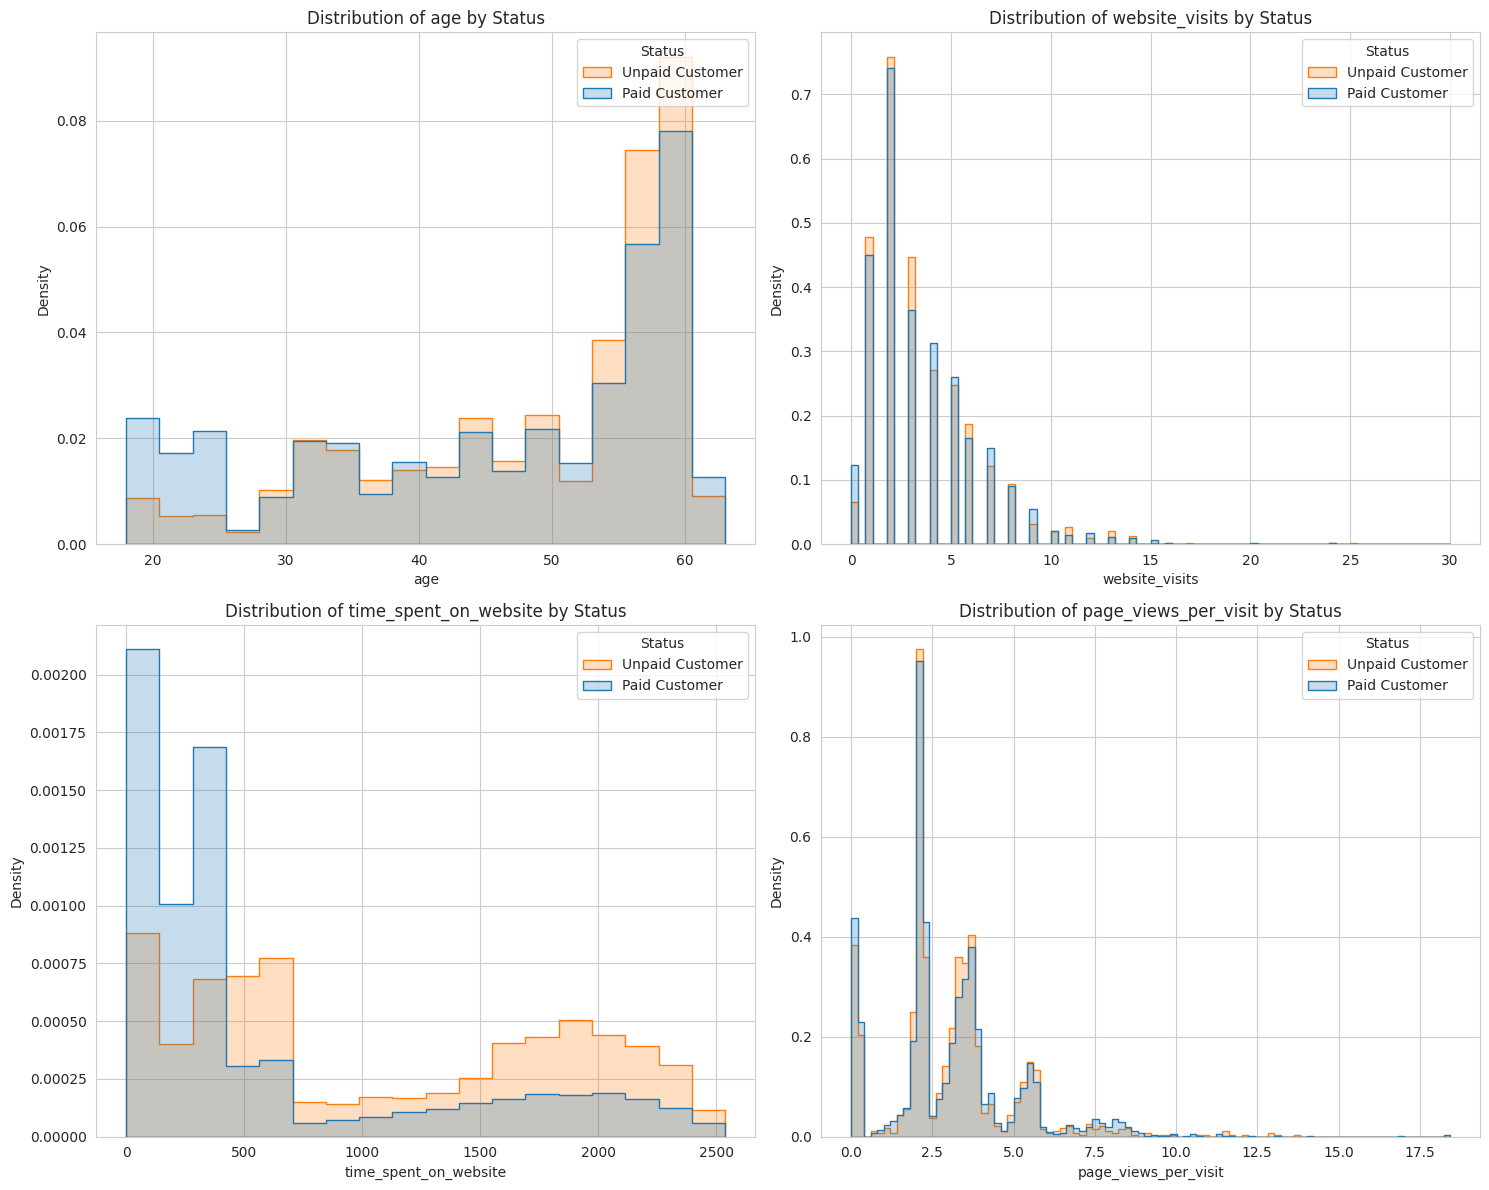

In [29]:
# List of numerical variables to visualize
numerical_vars = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Plot the distribution of numerical variables
plt.figure(figsize=(15, 12))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=var, hue='status', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {var} by Status')
    plt.legend(title='Status', labels=['Unpaid Customer', 'Paid Customer'])

plt.tight_layout()
plt.show()

## Here's what we can observe from the distributions of the numerical variables with respect to the target variable (status):

**1. Age:**
* The age distribution shows that younger leads (roughly in the age range of 20 to 30) have a higher conversion rate to paid customers.
* Leads aged above 50 have a relatively lower conversion rate.

**2. Website Visits:**
* Leads that visited the website 1-3 times tend to have a higher conversion rate compared to those who visited more frequently.
* However, it's interesting to note that there's a small peak in conversion rate for leads who visited the website around 7-8 times.

**3. Time Spent on Website:**
* Leads that spent a moderate amount of time (roughly between 100 to 800 seconds) on the website have a higher conversion rate.
* Leads that spent very little or a lot of time on the website show a lower conversion rate.

**4. Page Views per Visit**:
* The conversion rate is slightly higher for leads that viewed an average of 2 to 4 pages during their visits.
* Leads that viewed either very few or a large number of pages per visit have a lower conversion rate.

##*These insights give us an initial understanding of how various attributes of the leads relate to their conversion likelihood*

## Next, we'll explore the distribution of categorical variables and their relationship with the target variable.

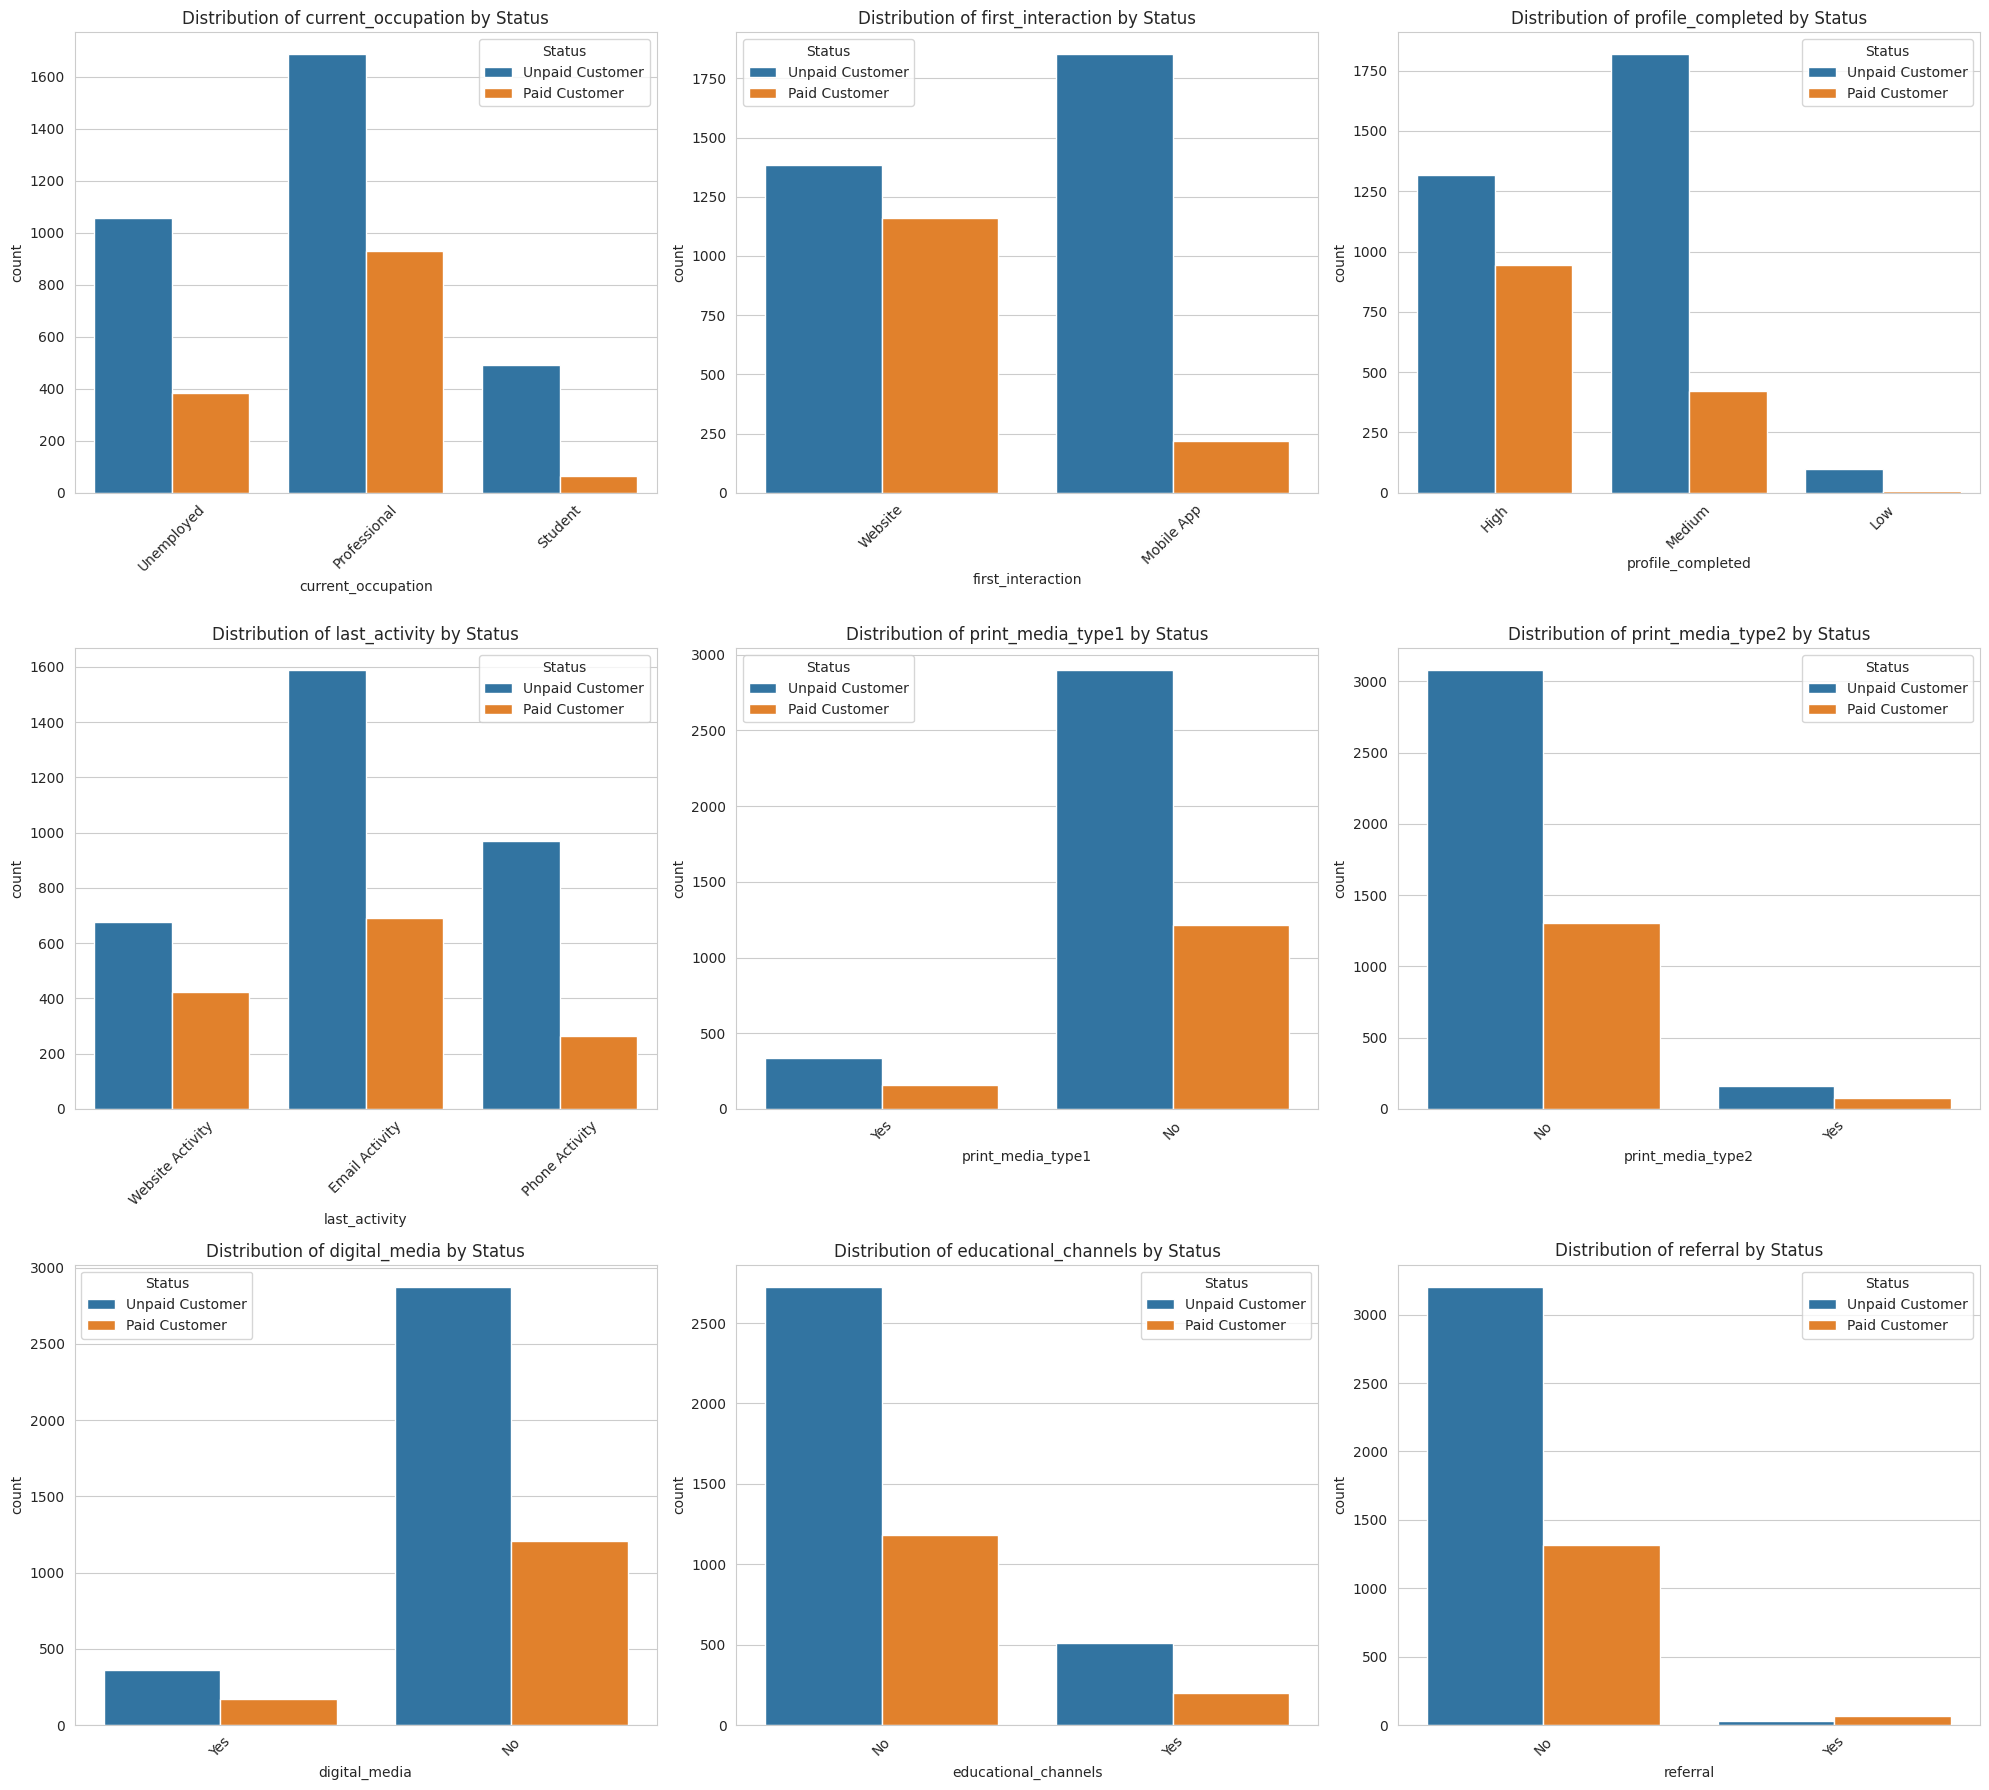

In [30]:
# List of categorical variables to visualize
categorical_vars = ['current_occupation', 'first_interaction', 'profile_completed',
                    'last_activity', 'print_media_type1', 'print_media_type2',
                    'digital_media', 'educational_channels', 'referral']

# Plot the distribution of categorical variables
plt.figure(figsize=(20, 18))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=var, hue='status')
    plt.title(f'Distribution of {var} by Status')
    plt.legend(title='Status', labels=['Unpaid Customer', 'Paid Customer'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##Here's what we can observe from the distributions of the categorical variables with respect to the target variable (**status**):

**1. Current Occupation**:

* Professionals have a higher conversion rate compared to Unemployed and Students.

**2. First Interaction**:
* Leads who first interacted through the website have a slightly higher conversion rate than those who interacted via the mobile app.

**3. Profile Completed**:
* Leads who have completed a high percentage (75-100%) of their profile have a significantly higher conversion rate.

**4. Last Activity**:
Email activity seems to have the highest conversion rate, followed by Phone activity. Website activity has a relatively lower conversion rate.

**5. Print Media Type1 & Type2:**
* The conversion rate doesn't seem to be significantly impacted by whether a lead saw the ad in a newspaper or magazine.

**6. Digital Media:**
* Leads who saw the ad on digital platforms have a slightly higher conversion rate.

**7. Educational Channels:**
* The conversion rate doesn't seem to be significantly impacted by whether a lead heard about ExtraaLearn through educational channels.

**8. Referral:**
* Very few leads heard about ExtraaLearn through reference, and their conversion rate is relatively low.

##*These insights help us understand the influence of various attributes on lead conversion*.

#Next, we'll proceed with Data Preprocessing to prepare the data for modeling. This will include encoding categorical variables, scaling numerical variables, and splitting the data into training and testing sets.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate the features and target variable
X = data.drop(columns=['ID', 'status'])
y = data['status']

# Encoding categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the numerical variables
scaler = StandardScaler()
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

X_train.head(), X_test.head()

(           age  current_occupation  first_interaction  profile_completed  \
 647  -0.093515                   0                  1                  2   
 2201  1.282118                   2                  1                  2   
 3362  0.594301                   2                  1                  0   
 617   0.747150                   0                  0                  0   
 1213 -0.322788                   0                  1                  0   
 
       website_visits  time_spent_on_website  page_views_per_visit  \
 647         0.487569              -0.876699              2.868348   
 2201       -0.896267              -0.892823              0.506154   
 3362       -0.550308              -0.859231              0.396817   
 617         0.141610               1.515021             -0.852170   
 1213        0.487569               0.622829             -0.469236   
 
       last_activity  print_media_type1  print_media_type2  digital_media  \
 647               0                 

The data has been preprocessed:

1. Categorical variables have been encoded.
2. Numerical variables have been scaled.
3. The dataset has been split into training and testing sets.

## Now, we'll move on to the **Model Building** phase. We'll:

1. Train various classification models.
2. Evaluate their performance on the training data using cross-validation.
3. Choose the best model based on performance and train it on the entire training set.
4. Evaluate the model's performance on the testing set.

## For simplicity, let's start by training a Logistic Regression model, which is a commonly used algorithm for binary classification tasks. We'll then evaluate its performance using cross-validation on the training data. We will then proceed to build a decision tree and random forest models for comparison on best performing model for the case study.

## Building a Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Evaluate the model using cross-validation on the training data
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

cross_val_scores.mean(), cross_val_scores.std()

(0.8080822789231963, 0.0117055075043858)

##Observations

* The Logistic Regression model, when evaluated using cross-validation on the training data, achieved an average accuracy of approximately 80.81%.
* The standard deviation in the accuracy across the folds is approximately 1.17 %.

Given that Logistic Regression provides a good baseline, we can further consider more complex models to potentially improve performance

## Let's proceed with building a Decision Tree model for the data. The Decision Tree model is a non-linear classifier that can capture intricate patterns in the dataset.

Steps to follow:

1. Train a Decision Tree classifier on the training data.
2. Evaluate its performance using cross-validation on the training data.
3. Train the model on the entire training set.
4. Evaluate the model's performance on the testing set.
5. Visualize the Decision Tree.


## Building a Decision Tree model

In [33]:
#Let's start by training the Decision Tree classifier and evaluating its performance using cross-validation on the training data
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Evaluate the model using cross-validation on the training data
cross_val_scores_dt = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')

cross_val_scores_dt.mean(), cross_val_scores_dt.std()

(0.8053700455593431, 0.006132760699201397)

The Decision Tree classifier achieved an average accuracy of approximately
80.54%.
The standard deviation in the accuracy across the folds is approximately
0.61%.

*Now, let's train the Decision Tree classifier on the entire training set and then evaluate its performance on the testing set to get an unbiased estimate of its accuracy*.

In [34]:
# Train the Decision Tree classifier on the entire training set
dt_clf.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
test_accuracy_dt = dt_clf.score(X_test, y_test)

test_accuracy_dt

0.7930660888407367

*Let's visualize the top levels of the Decision Tree.*

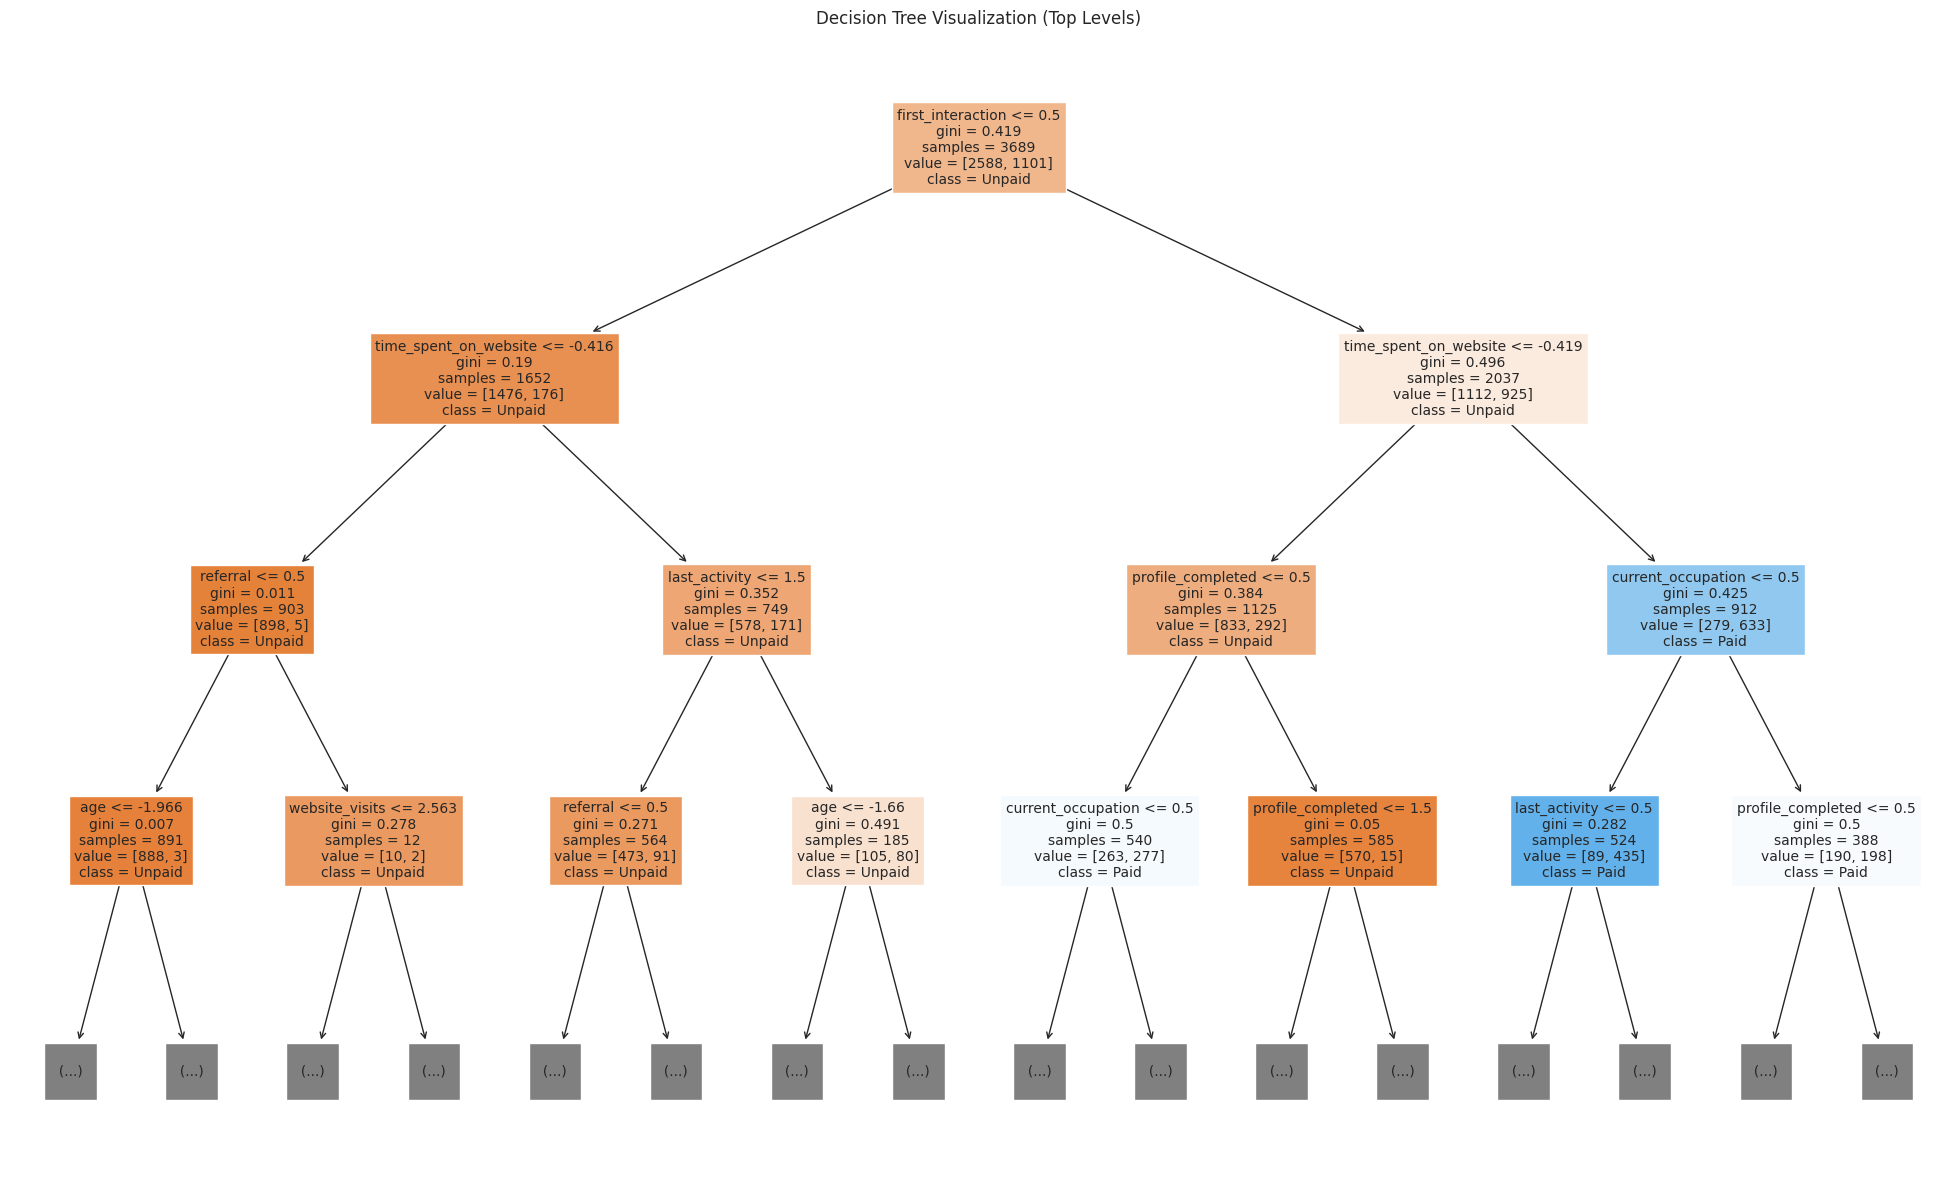

In [35]:
from sklearn.tree import plot_tree

# Plot the top levels of the Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(dt_clf, feature_names=X_train.columns, class_names=['Unpaid', 'Paid'], filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Top Levels)")
plt.show()

##Observations

* The Decision Tree classifier achieved an accuracy of approximately 79.31% on the testing set.
From the visualization of the top levels of the Decision Tree:
*The tree starts with the most important feature at the root and splits the data based on conditions related to feature values.
*Each node displays:
  * The feature and condition used for the split.
  * The **gini** impurity value.
  * The total samples at that node.
  * The distribution of samples between the two classes (**Unpaid** and **Paid**).
  * The dominant class at that node (shown as the class label).

The visualization provides insights into how the Decision Tree model makes its decisions based on feature values. The colors of the nodes also give an indication of the dominant class, with darker shades indicating higher confidence.

## Do we need to prune the tree?

Pruning a decision tree involves reducing its size by removing branches to combat overfitting and improve generalization. A tree that is too deep tends to fit the training data very well but might not perform as effectively on unseen data.

Before deciding on pruning, let's evaluate a few points:

1. **Tree Depth**: A very deep tree might be an indicator of overfitting.
2. **Performance on Training vs. Testing Data**: A significant difference in performance on training data compared to testing data can be indicative of overfitting.
3. **Complexity**: If the tree is overly complex, pruning can simplify it, making it easier to interpret.

Let's first check the depth of the current tree and its performance on the training data. This will help us gauge if pruning might be beneficial.

In [36]:
# Get the depth of the current tree
tree_depth = dt_clf.get_depth()

# Evaluate the model's performance on the training set
train_accuracy_dt = dt_clf.score(X_train, y_train)

tree_depth, train_accuracy_dt

(21, 0.9997289238275956)

The current Decision Tree has a depth of 21, which is quite deep. Additionally, the model achieved an accuracy of approximately
**99.97%** on the training data.

Given the near-perfect accuracy on the training set and the depth of the tree, it's highly likely that the tree has overfitted to the training data. This overfitting is further evidenced by the fact that the model's performance on the testing set was around
**79.31%**, significantly lower than its training accuracy.

Given these observations, pruning the tree would be a good idea to reduce overfitting and potentially improve generalization to unseen data.

We can prune the tree using the **max_depth** parameter to control its depth. By setting an optimal value for **max_depth**, we can achieve a balance between underfitting and overfitting.

Let's perform a grid search over a range of **max_depth** values to find the optimal depth for the Decision Tree.

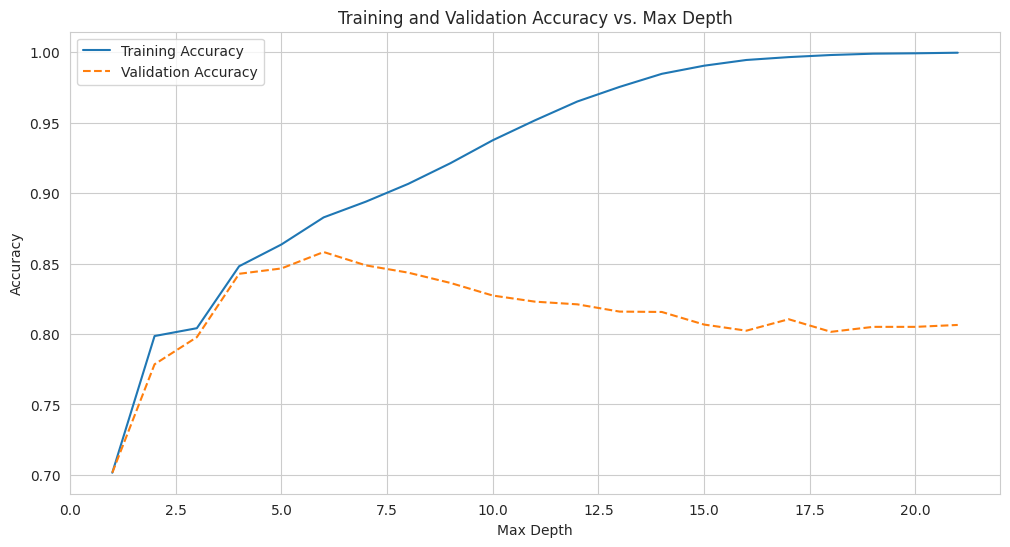

{'max_depth': 6}

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth
param_grid = {'max_depth': list(range(1, 22))}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit to the data
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Plotting the training and testing accuracy as a function of max_depth
plt.figure(figsize=(12, 6))
plt.plot(results['param_max_depth'], results['mean_train_score'], label='Training Accuracy')
plt.plot(results['param_max_depth'], results['mean_test_score'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Return the best max_depth
grid_search.best_params_


## Observations

The plot depicts the training and validation accuracies as a function of the tree depth (**max_depth**). As we can observe:

* **Training Accuracy**: As expected, the training accuracy increases with tree depth. It becomes nearly perfect as the tree grows deeper, indicating overfitting.
* **Validation Accuracy**: The validation accuracy (**from cross-validation**) peaks around **max_depth** of 6 and then starts decreasing, suggesting that the optimal depth for the tree to avoid overfitting is around 6.

The grid search determined that a **max_depth of 6** is optimal in terms of validation accuracy.

## **Given this result, we should prune the tree by setting its max_depth to 6, then train it on the entire training set, and finally evaluate its performance on the testing set**.

In [38]:
# Train a pruned Decision Tree with max_depth=6
pruned_dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
pruned_dt_clf.fit(X_train, y_train)

# Evaluate the pruned tree's performance on the testing set
pruned_test_accuracy_dt = pruned_dt_clf.score(X_test, y_test)

pruned_test_accuracy_dt

0.8580715059588299

##Observations

After pruning the Decision Tree to a maximum depth of 6, it achieved an accuracy of approximately **85.81%** on the testing set. This is an improvement over the unpruned tree's accuracy of **79.31%**.

## **Pruning the tree helped in reducing overfitting and enhancing its generalization capability on unseen data**.

## Building a Random Forest model

 Let's also train a Random Forest classifier, which is an ensemble model that often performs well on classification tasks due to its ability to capture non-linear relationships and feature interactions.

 We'll evaluate the Random Forest model's performance using cross-validation on the training data.

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model using cross-validation on the training data
cross_val_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

cross_val_scores_rf.mean(), cross_val_scores_rf.std()

(0.8525366515537611, 0.01041148640127999)

##Observations

* The Random Forest classifier achieved an average accuracy of approximately 85.25%.
* The standard deviation in the accuracy across the folds is approximately 1.04%.

The Random Forest model consists of multiple decision trees, each trained on a subset of the data. Therefore, unlike a single Decision Tree, it's not possible to visualize the entire Random Forest in a single, coherent tree diagram. However, we can visualize individual trees from the Random Forest to understand their structure and splits.

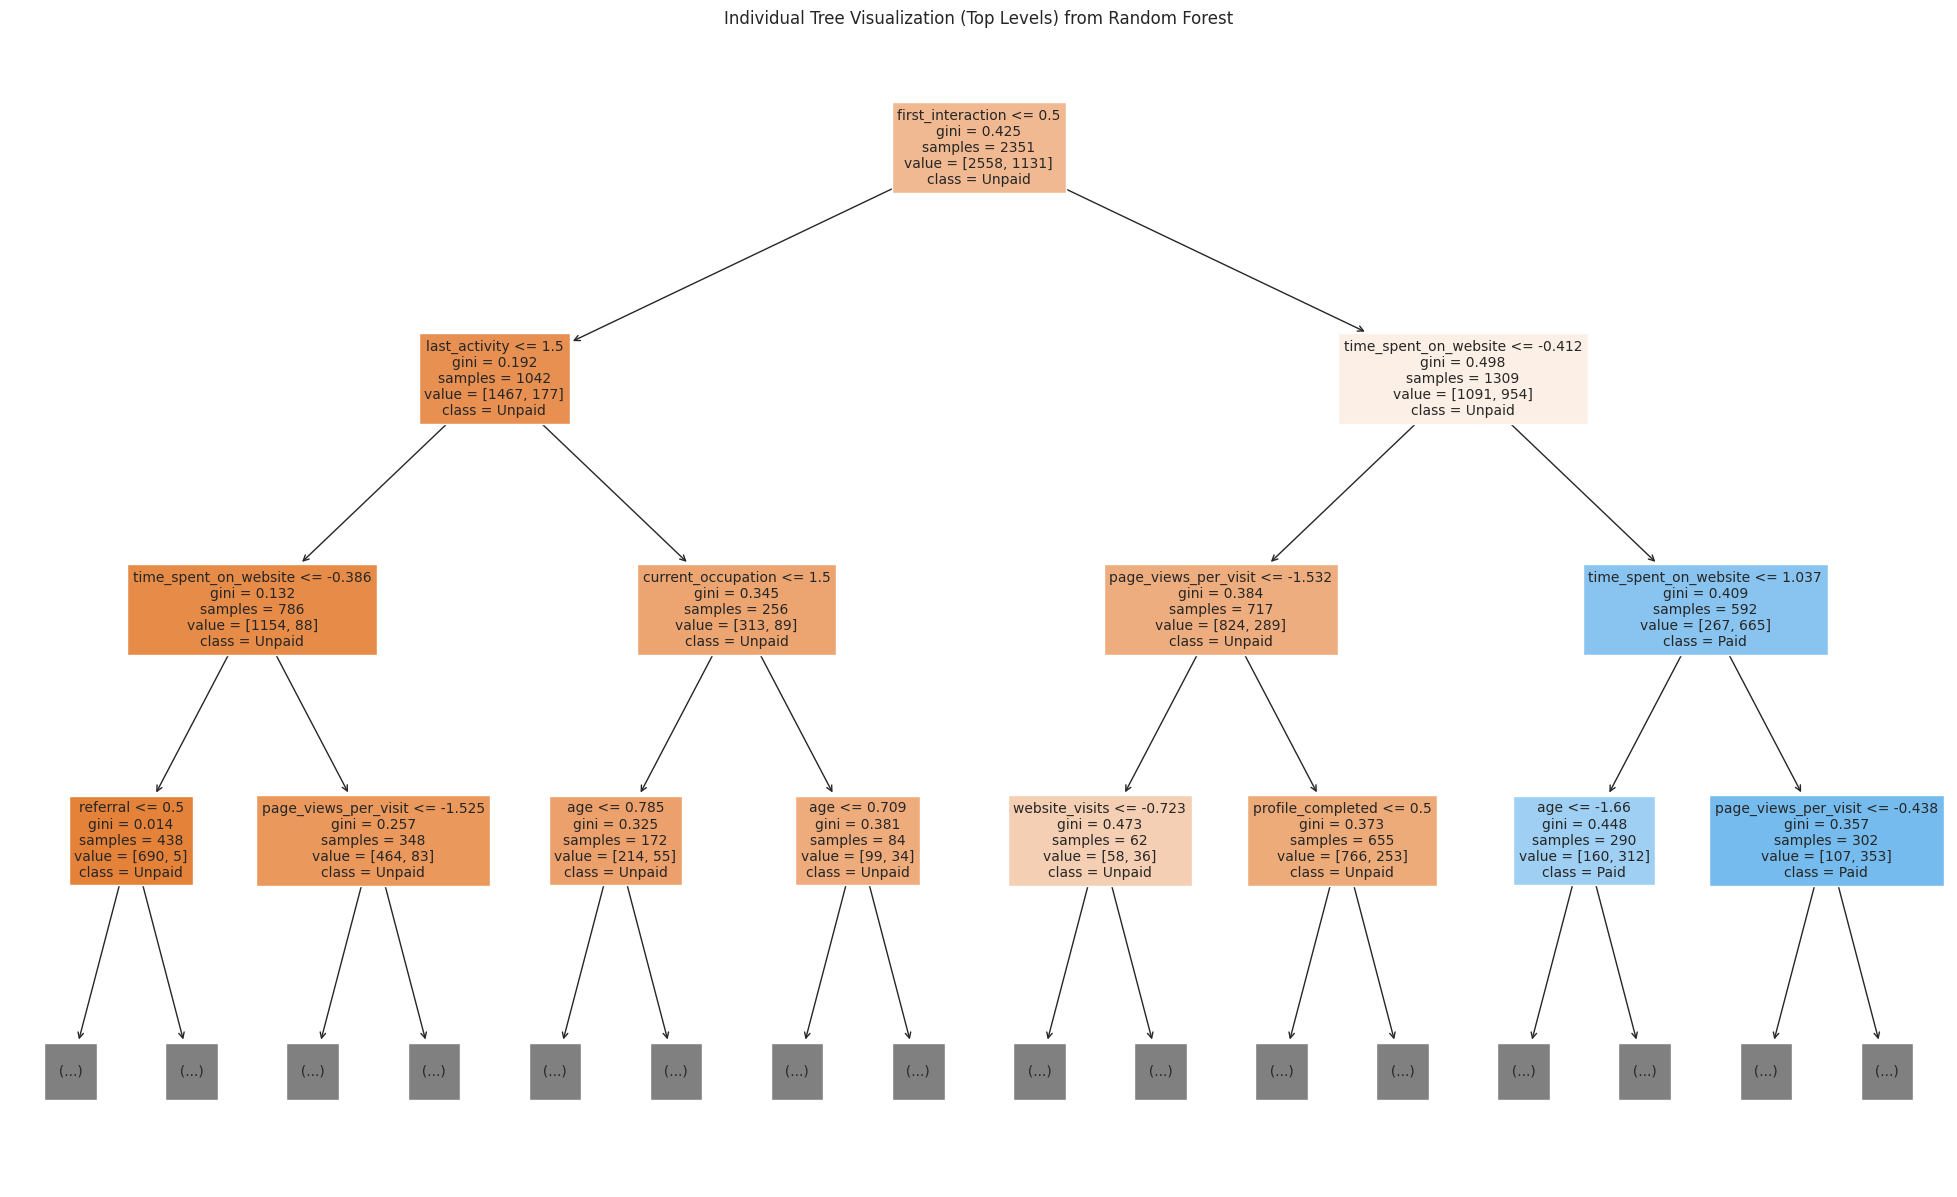

In [44]:
#Let's visualize one of the trees from our trained Random Forest.
# Extract one of the trees from the Random Forest
from sklearn.ensemble import RandomForestClassifier

# Retrain the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

individual_tree = rf_clf.estimators_[5]

# Plot the top levels of the individual tree from the Random Forest
plt.figure(figsize=(25, 15))
plot_tree(individual_tree, feature_names=X_train.columns, class_names=['Unpaid', 'Paid'], filled=True, max_depth=3, fontsize=10)
plt.title("Individual Tree Visualization (Top Levels) from Random Forest")
plt.show()

##Observations:

* Just like the standalone Decision Tree, this tree starts with the most significant feature at the root and splits the data based on conditions related to feature values.
* Each node provides details about the feature and condition used for the split, the gini impurity, the total samples at that node, the distribution of samples between the two classes (Unpaid and Paid), and the dominant class at that node.
* The node colors provide an indication of the dominant class, with darker shades representing higher confidence.

It's worth noting that while this is just one tree from the Random Forest, there are many such trees, each possibly having different structures and splits based on the subset of the data and features they were trained on. The final prediction from the Random Forest is typically an average or majority vote from all these trees

## Do we need to prune the tree?


As for pruning the Random Forest:

* Random Forests are inherently less prone to overfitting compared to individual Decision Trees. This is due to the ensemble approach, where the model averages out the predictions from multiple trees, leading to a more generalized result.
* While we can control the depth of the trees in the Random Forest using the **max_depth** parameter (similar to a Decision Tree), it's often not as necessary. The nature of Random Forests, which involves bootstrapping samples and feature randomness, often results in diverse trees that collectively avoid overfitting.
* We can tune hyperparameters (**like max_depth**, **min_samples_split**, etc.) to optimize the Random Forest's performance, but pruning in the traditional sense (like we did for the Decision Tree) isn't typically required

## Actionable Insights and Recommendations

Based on the data analysis, model building, and feature importance results, here are some actionable insights and recommendations for ExtraaLearn:

**1. Importance of Engagement:**
* Time Spent on Website: Leads that spend more time on the website are more likely to convert. This indicates that content quality, user experience, and ease of navigation on the website are crucial.
  * Recommendation: Enhance website content, provide engaging materials like webinars, articles, or free courses to increase user engagement. Ensure the website is user-friendly and mobile-responsive.

**2. Age Matters:**
* Age: Younger leads, especially those in the age range of 20 to 30, are more inclined to convert.
  * Recommendation: Tailor marketing campaigns to appeal to this age group. Offer courses that resonate with their career aspirations and learning goals.

**3. Frequency of Interaction:**
* Website Visits: Leads that visit the website more frequently are more likely to convert.
  * Recommendation: Encourage repeat visits by offering fresh content, newsletters, or exclusive member-only resources.

**4. Depth of Exploration:**
* Page Views per Visit: The average number of pages viewed during a visit can indicate the level of interest of the lead.
  * Recommendation: Create compelling call-to-action buttons and interlink articles or courses to encourage exploration.

**5. Digital Presence:**
* Digital Media: Leads exposed to digital ads are more inclined to convert.
  * Recommendation: Invest more in digital advertising platforms. Consider retargeting campaigns for leads who have visited the site but haven't converted.

**6. Focus on Professionals:**
* Current Occupation: Professionals or those currently employed are more inclined to upskill.
  * Recommendation: Offer courses tailored to working professionals, considering their time constraints and specific needs. Weekend batches or self-paced courses could be attractive.

**7. Decision Tree Insights:**
* The visualization of the decision tree provides specific thresholds and conditions that are influential in lead conversion. For instance, leads who spend more than a certain number of seconds on the website and belong to a specific age group might have a higher conversion rate.
  * Recommendation: Use these insights to segment leads and tailor personalized marketing campaigns for different segments.

**8. Model-Based Approach:**
* Use the trained Random Forest model to predict the likelihood of conversion for new leads. This will allow the marketing and sales teams to prioritize and focus on leads that are more likely to convert.
  * Recommendation: Integrate the model into the CRM system to provide real-time predictions for the sales team.

**9. Feedback Loop:**
* As more data becomes available, especially about leads that were predicted to convert but didn't (and vice versa), retrain the model to capture these nuances.
  * Recommendation: Establish a feedback loop where the sales team provides input about the accuracy of predictions, allowing continuous improvement of the model.

##*In summary, a combination of data-driven insights and a model-based approach can significantly enhance the efficiency of the lead conversion process for ExtraaLearn. Focusing on key factors, tailoring marketing strategies, and leveraging the predictive model can lead to increased conversions and business growth*.